# Part 1

Part 1 requires the selection of three data files for analysis. I chose small networks: BOT_REQUESTS.csv; medium networks: ITEMS.csv; large networks: REQUEST_FOR_DELETION.csv

## Task A

Based on the small network BOT_REQUESTS.csv

In [2]:
import pandas as pd
import networkx as nx
from itertools import combinations

df = pd.read_csv('D://kcl/Network Data Analysis/assessment/datasets/BOT_REQUESTS.csv')
G = nx.Graph()

# Group by page name and thread subject
grouped = df.groupby(['page_name', 'thread_subject'])

# Build edges
for _, group in grouped:
    users = group['username'].unique()
    for user1, user2 in combinations(users, 2):
        if G.has_edge(user1, user2):
            G[user1][user2]['weight'] += 1
        else:
            G.add_edge(user1, user2, weight=1)

# Network statistics
print(f'Number of nodes: {G.number_of_nodes()}')
print(f'Number of edges: {G.number_of_edges()}')
avg_degree = sum(dict(G.degree()).values()) / G.number_of_nodes()
print(f'Average degree: {avg_degree:.2f}')

Number of nodes: 527
Number of edges: 2425
Average degree: 9.20


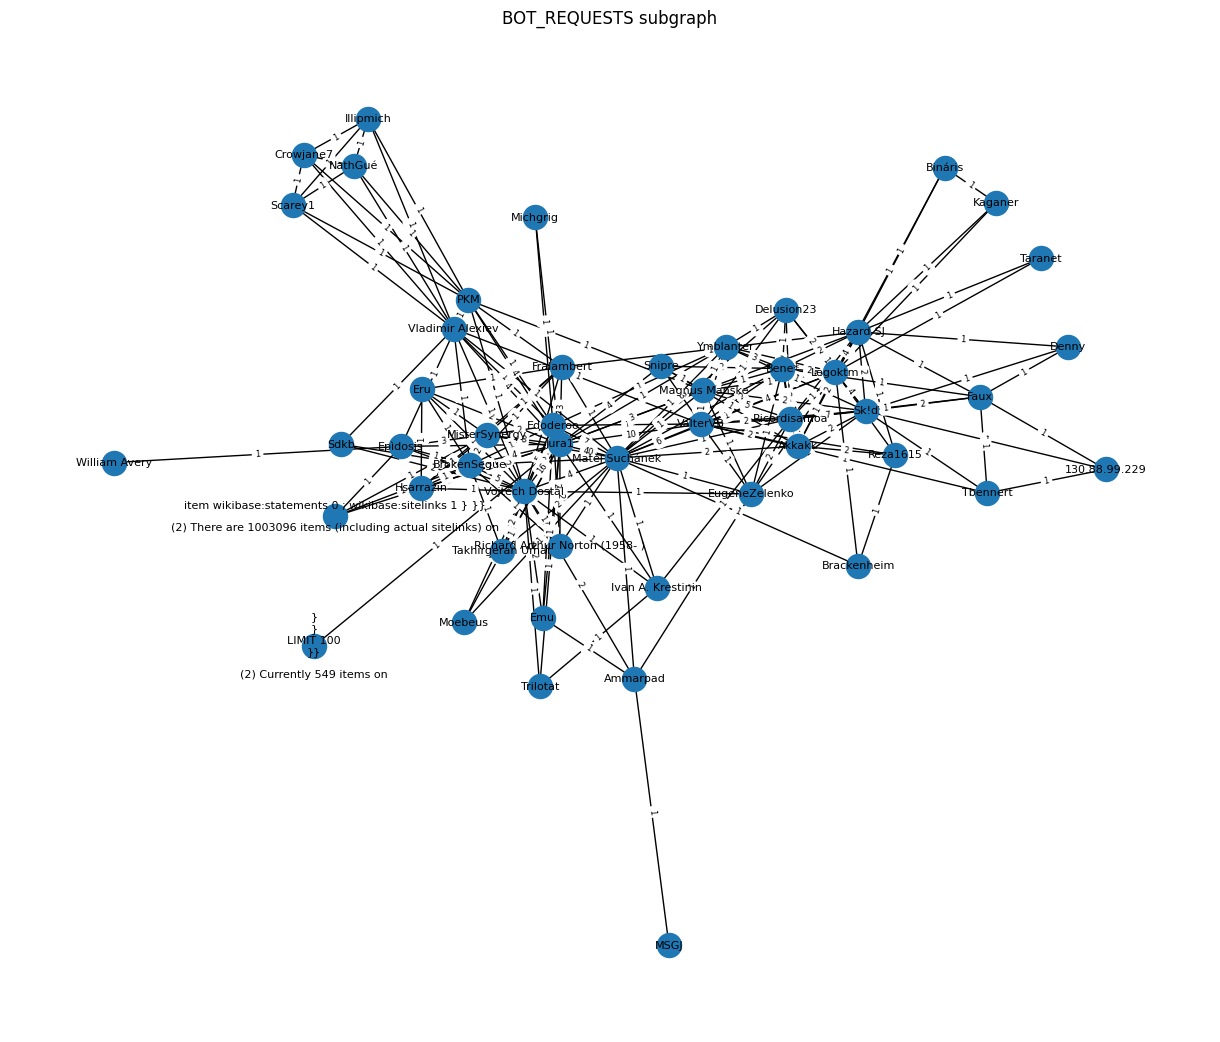

In [7]:
import matplotlib.pyplot as plt

# Visualize the first 50 nodes subgraph
sub_nodes = list(G.nodes())[:50]
G_sub = G.subgraph(sub_nodes)
pos = nx.spring_layout(G_sub, seed=42)

plt.figure(figsize=(12, 10))
nx.draw(G_sub, pos, with_labels=True, node_size=300, font_size=8)
nx.draw_networkx_edge_labels(G_sub, pos,
    edge_labels={(u, v): d['weight'] for u, v, d in G_sub.edges(data=True)},
    font_size=6)
plt.title('BOT_REQUESTS subgraph')
plt.axis('off')
plt.show()

Based on the medium network ITEMS.csv

In [21]:
import pandas as pd
import networkx as nx
from itertools import combinations

df_items = pd.read_csv("D://kcl/Network Data Analysis/assessment/datasets/ITEMS.csv")
G_items = nx.Graph()
grouped = df_items.groupby(['page_name', 'thread_subject'])
for _, group in grouped:
    users = group['username'].unique()
    for u1, u2 in combinations(users, 2):
        if G_items.has_edge(u1, u2):
            G_items[u1][u2]['weight'] += 1
        else:
            G_items.add_edge(u1, u2, weight=1)

# Basic network information
print("Number of nodes:", G_items.number_of_nodes())
print("Number of edges:", G_items.number_of_edges())
avg_deg = sum(dict(G_items.degree()).values()) / G_items.number_of_nodes()
print("Average degree:", round(avg_deg, 2))

Number of nodes: 3539
Number of edges: 7252
Average degree: 4.1


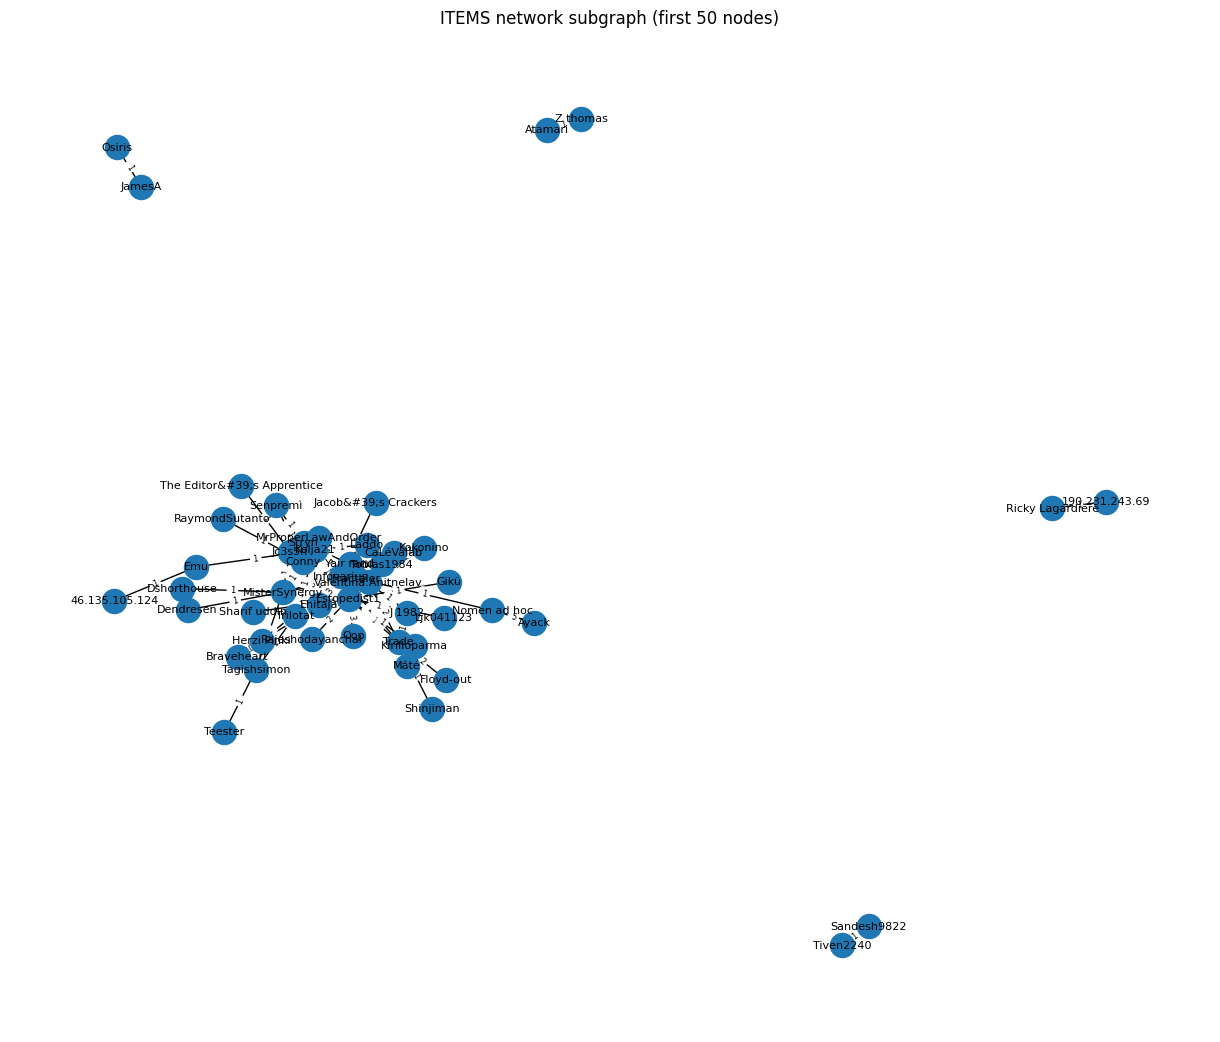

In [22]:
import matplotlib.pyplot as plt

# Visualize subgraph (first 50 nodes)
sub_nodes = list(G_items.nodes())[:50]
G_sub = G_items.subgraph(sub_nodes)

plt.figure(figsize=(12, 10))
pos = nx.spring_layout(G_sub, seed=42)
nx.draw(G_sub, pos, with_labels=True, node_size=300, font_size=8)
nx.draw_networkx_edge_labels(G_sub, pos,
    edge_labels={(u, v): d['weight'] for u, v, d in G_sub.edges(data=True)},
    font_size=6)
plt.title("ITEMS network subgraph (first 50 nodes)")
plt.axis("off")
plt.show()

Based on the large network REQUEST_FOR_DELETION.csv

In [16]:
import pandas as pd
import networkx as nx
from itertools import combinations

df_requests = pd.read_csv("D://kcl/Network Data Analysis/assessment/datasets//REQUEST_FOR_DELETION.csv")
G_requests = nx.Graph()
grouped = df_requests.groupby(['page_name', 'thread_subject'])
for _, group in grouped:
    users = group['username'].unique()
    for u1, u2 in combinations(users, 2):
        if G_requests.has_edge(u1, u2):
            G_requests[u1][u2]['weight'] += 1
        else:
            G_requests.add_edge(u1, u2, weight=1)

# Basic statistics
print(f"Number of nodes:{G_requests.number_of_nodes()}")
print(f"Number of edges:{G_requests.number_of_edges()}")
avg_deg = sum(dict(G_requests.degree()).values()) / G_requests.number_of_nodes()
print(f"Average degree:{avg_deg:.2f}")

Number of nodes:9887
Number of edges:33488
Average degree:6.77


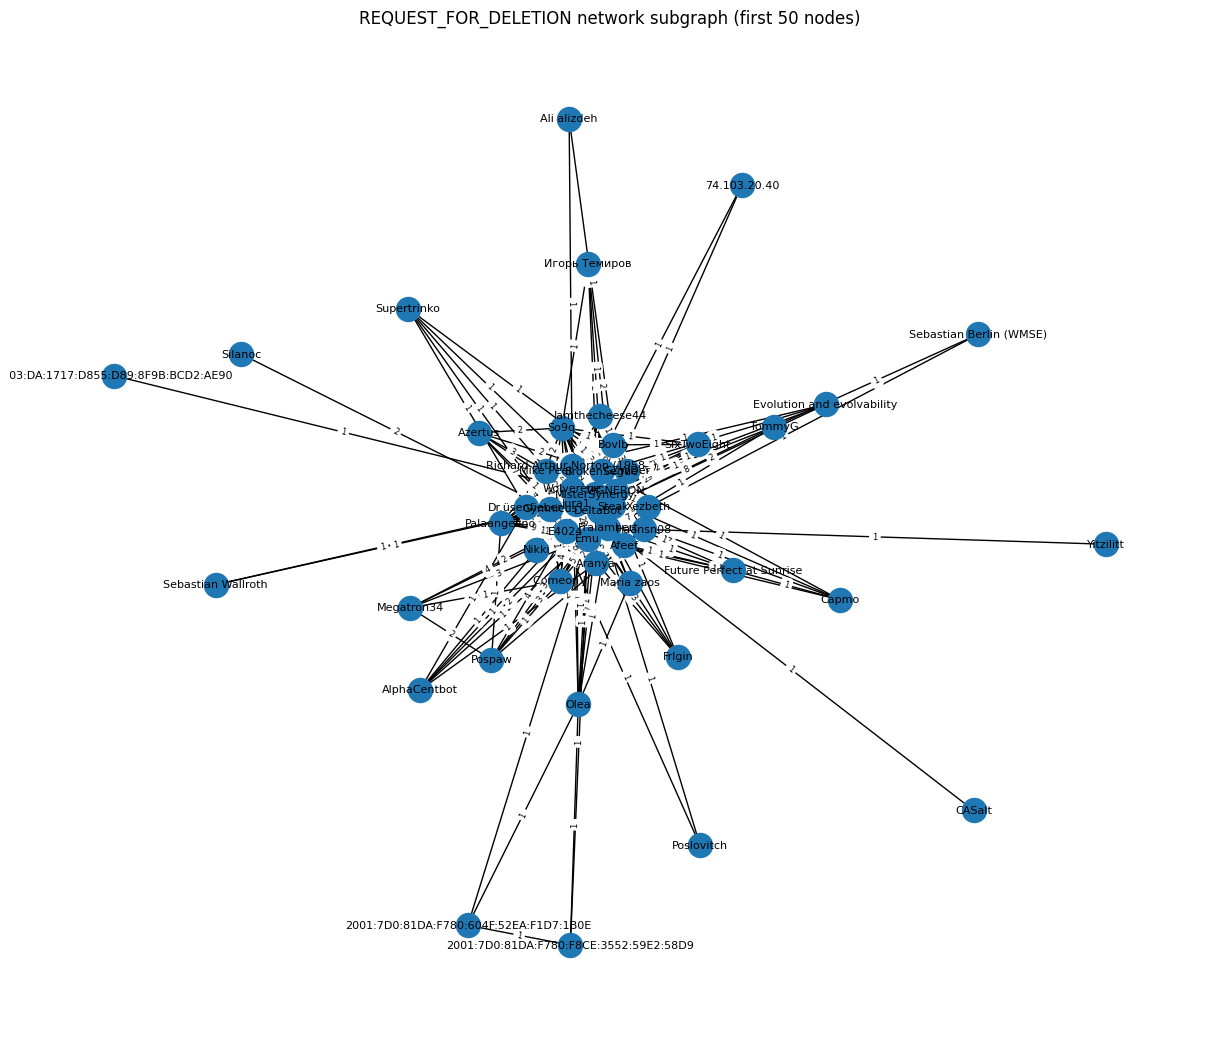

In [17]:
import matplotlib.pyplot as plt

# Visualize subgraph (first 50 nodes)
sub_nodes = list(G_requests.nodes())[:50]
G_sub = G_requests.subgraph(sub_nodes)

plt.figure(figsize=(12, 10))
pos = nx.spring_layout(G_sub, seed=42)
nx.draw(G_sub, pos, with_labels=True, node_size=300, font_size=8)
nx.draw_networkx_edge_labels(G_sub, pos,
    edge_labels={(u, v): d['weight'] for u, v, d in G_sub.edges(data=True)},
    font_size=6)
plt.title("REQUEST_FOR_DELETION network subgraph (first 50 nodes)")
plt.axis("off")
plt.show()

## Task B

Based on the small network BOT_REQUESTS.csv

In [11]:
import numpy as np

# Indicator calculation
density = nx.density(G)
avg_clustering = nx.average_clustering(G)
largest_cc = max(nx.connected_components(G), key=len)
G_lcc = G.subgraph(largest_cc).copy()
diameter = nx.diameter(G_lcc)
avg_path_length = nx.average_shortest_path_length(G_lcc)

degree_sequence = [d for n, d in G.degree()]
degree_counts = np.bincount(degree_sequence)
degree_values = np.nonzero(degree_counts)[0]

print(f"Maximum number of connected subgraph nodes:{len(G_lcc)}")
print(f"Edge density:{density:.4f}")
print(f"Average clustering coefficient:{avg_clustering:.4f}")
print(f"Average path length:{avg_path_length:.4f}")
print(f"Network diameter:{diameter}")
print("\nDegree distribution (partial):")
for d, c in zip(degree_values, degree_counts[degree_values]):
    print(f"degree {d} :{c} nodes")

# Random network comparison
p = density
G_rand = nx.erdos_renyi_graph(n=G.number_of_nodes(), p=p)
if nx.is_connected(G_rand):
    rand_avg_path_length = nx.average_shortest_path_length(G_rand)
    rand_diameter = nx.diameter(G_rand)
else:
    rand_lcc = G_rand.subgraph(max(nx.connected_components(G_rand), key=len)).copy()
    rand_avg_path_length = nx.average_shortest_path_length(rand_lcc)
    rand_diameter = nx.diameter(rand_lcc)

rand_clustering = nx.average_clustering(G_rand)
print("\nComparison with random networks")
print(f"Average clustering coefficient of random graph:{rand_clustering:.4f}")
print(f"Average path length in a random graph:{rand_avg_path_length:.4f}")
print(f"Random graph diameter:{rand_diameter}")

Maximum number of connected subgraph nodes:519
Edge density:0.0175
Average clustering coefficient:0.6887
Average path length:2.6027
Network diameter:6

Degree distribution (partial):
degree 1 :71 nodes
degree 2 :99 nodes
degree 3 :84 nodes
degree 4 :44 nodes
degree 5 :39 nodes
degree 6 :35 nodes
degree 7 :16 nodes
degree 8 :18 nodes
degree 9 :16 nodes
degree 10 :11 nodes
degree 11 :4 nodes
degree 12 :7 nodes
degree 13 :6 nodes
degree 14 :3 nodes
degree 15 :4 nodes
degree 16 :5 nodes
degree 17 :6 nodes
degree 18 :2 nodes
degree 19 :1 nodes
degree 20 :3 nodes
degree 21 :6 nodes
degree 22 :1 nodes
degree 23 :1 nodes
degree 24 :3 nodes
degree 25 :1 nodes
degree 27 :3 nodes
degree 28 :1 nodes
degree 29 :1 nodes
degree 31 :1 nodes
degree 32 :3 nodes
degree 33 :1 nodes
degree 35 :2 nodes
degree 36 :3 nodes
degree 39 :1 nodes
degree 41 :1 nodes
degree 42 :2 nodes
degree 43 :1 nodes
degree 44 :1 nodes
degree 46 :1 nodes
degree 47 :2 nodes
degree 48 :3 nodes
degree 49 :1 nodes
degree 53 :1 nodes

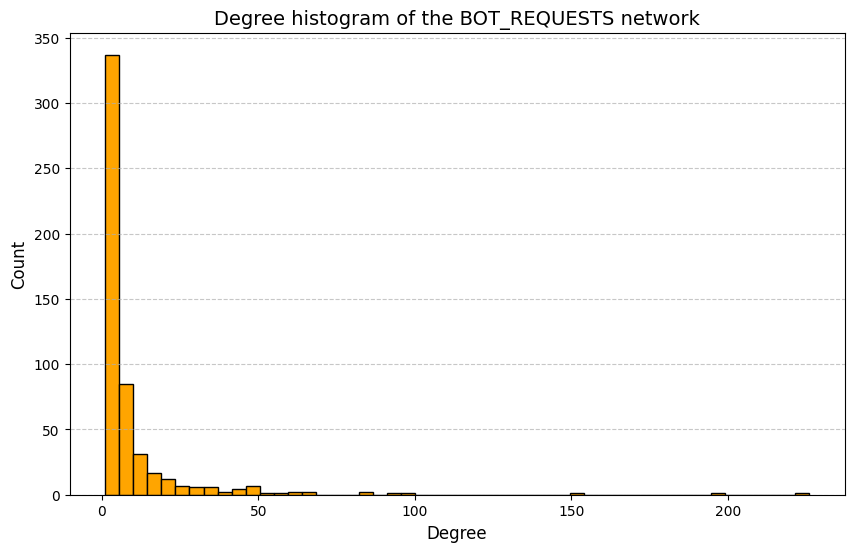

In [12]:
# Histogram: Overall distribution of node degrees
plt.figure(figsize=(10, 6))
plt.hist(degree_sequence, bins=50, color='orange', edgecolor='black')
plt.title("Degree histogram of the BOT_REQUESTS network", fontsize=14)
plt.xlabel("Degree", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Based on the medium network ITEMS.csv

In [25]:
import numpy as np
import random
import networkx as nx

# Network structure indicators
density = nx.density(G_items)
avg_clustering = nx.average_clustering(G_items)
largest_cc = max(nx.connected_components(G_items), key=len)
G_lcc = G_items.subgraph(largest_cc).copy()
nodes_lcc = list(G_lcc.nodes())

# Estimating path length and diameter using sampling methods
sample_pairs = [random.sample(nodes_lcc, 2) for _ in range(100)]
path_lengths = []
for u, v in sample_pairs:
    try:
        path_lengths.append(nx.shortest_path_length(G_lcc, source=u, target=v))
    except nx.NetworkXNoPath:
        continue
approx_avg_path = np.mean(path_lengths)
approx_diameter = max(path_lengths)

# Constructing random graphs for comparison
n = G_items.number_of_nodes()
p = density
G_rand = nx.erdos_renyi_graph(n=n, p=p)
if nx.is_connected(G_rand):
    rand_avg_path = nx.average_shortest_path_length(G_rand)
    rand_diameter = nx.diameter(G_rand)
else:
    rand_lcc = G_rand.subgraph(max(nx.connected_components(G_rand), key=len)).copy()
    rand_avg_path = nx.average_shortest_path_length(rand_lcc)
    rand_diameter = nx.diameter(rand_lcc)
rand_clustering = nx.average_clustering(G_rand)

# Output core indicator results
print("ITEMS Network Indicators:")
print(f"Average degree:{round(sum(dict(G_items.degree()).values()) / G_items.number_of_nodes(), 2)}")
print(f"Density:{density:.5f}")
print(f"Average clustering coefficient:{avg_clustering:.3f}")
print(f"Estimate the average path length (sample 100 pairs):{approx_avg_path:.2f}")
print(f"Estimate network diameter:{approx_diameter}")

print("\nRandom network comparison:")
print(f"Average clustering coefficient:{rand_clustering:.3f}")
print(f"Average path length:{rand_avg_path:.2f}")
print(f"Diameter:{rand_diameter}")

ITEMS Network Indicators:
Average degree:4.1
Density:0.00116
Average clustering coefficient:0.267
Estimate the average path length (sample 100 pairs):3.47
Estimate network diameter:6

Random network comparison:
Average clustering coefficient:0.002
Average path length:5.91
Diameter:13


Degree distribution:
degree 1 :1872 nodes
degree 2 :591 nodes
degree 3 :311 nodes
degree 4 :174 nodes
degree 5 :123 nodes
degree 6 :77 nodes
degree 7 :68 nodes
degree 8 :35 nodes
degree 9 :44 nodes
degree 10 :27 nodes
degree 11 :21 nodes
degree 12 :18 nodes
degree 13 :13 nodes
degree 14 :15 nodes
degree 15 :5 nodes
degree 16 :11 nodes
degree 17 :18 nodes
degree 18 :11 nodes
degree 19 :6 nodes
degree 20 :6 nodes
degree 21 :6 nodes
degree 22 :4 nodes
degree 23 :6 nodes
degree 24 :3 nodes
degree 25 :5 nodes
degree 26 :1 nodes
degree 27 :2 nodes
degree 28 :5 nodes
degree 29 :2 nodes
degree 30 :5 nodes
degree 31 :5 nodes
degree 32 :2 nodes
degree 33 :2 nodes
degree 34 :2 nodes
degree 35 :3 nodes
degree 36 :1 nodes
degree 37 :1 nodes
degree 38 :1 nodes
degree 39 :2 nodes
degree 40 :1 nodes
degree 41 :2 nodes
degree 42 :1 nodes
degree 44 :2 nodes
degree 45 :1 nodes
degree 53 :1 nodes
degree 54 :2 nodes
degree 61 :1 nodes
degree 63 :1 nodes
degree 65 :2 nodes
degree 67 :1 nodes
degree 72 :1 no

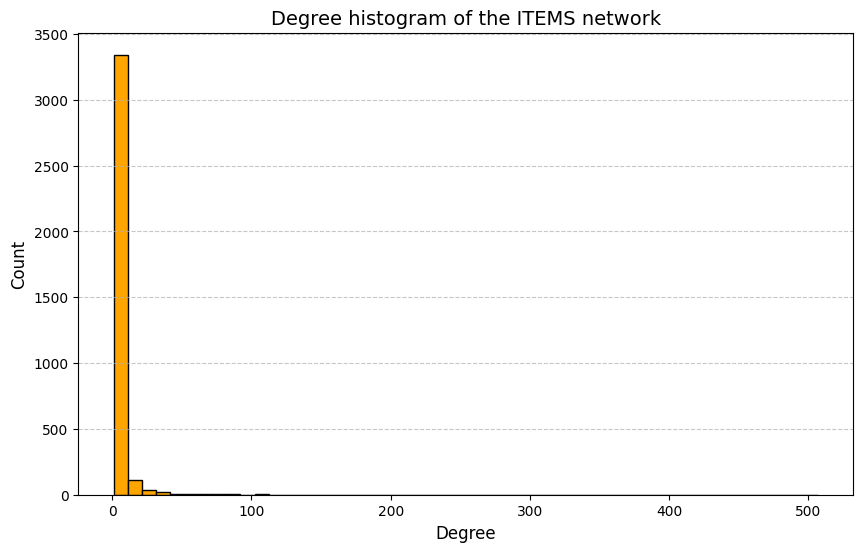

In [26]:
# Degree distribution
degree_sequence = [d for n, d in G_items.degree()]
degree_counts = np.bincount(degree_sequence)
degree_values = np.nonzero(degree_counts)[0]

print("Degree distribution:")
for d, c in zip(degree_values, degree_counts[degree_values]):
    print(f"degree {d} :{c} nodes")

# Degree distribution chart
plt.figure(figsize=(10, 6))
plt.hist(degree_sequence, bins=50, color='orange', edgecolor='black')
plt.title("Degree histogram of the ITEMS network", fontsize=14)
plt.xlabel("Degree", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Based on the large network REQUEST_FOR_DELETION.csv

In [18]:
import numpy as np
import random

# Network structure indicators
density = nx.density(G_requests)
avg_clustering = nx.average_clustering(G_requests)
largest_cc = max(nx.connected_components(G_requests), key=len)
G_lcc = G_requests.subgraph(largest_cc).copy()
nodes_lcc = list(G_lcc.nodes())

# Estimating path length and diameter using sampling methods
sample_pairs = [random.sample(nodes_lcc, 2) for _ in range(100)]
path_lengths = []
for u, v in sample_pairs:
    try:
        path_lengths.append(nx.shortest_path_length(G_lcc, source=u, target=v))
    except nx.NetworkXNoPath:
        continue
approx_avg_path = np.mean(path_lengths)
approx_diameter = max(path_lengths)

# Estimating Random Graph Structure Using Sampling
n = G_requests.number_of_nodes()
p = density
G_rand = nx.erdos_renyi_graph(n=n, p=p)
rand_nodes = list(G_rand.nodes())
rand_sample_pairs = [random.sample(rand_nodes, 2) for _ in range(100)]
rand_lengths = []
for u, v in rand_sample_pairs:
    try:
        rand_lengths.append(nx.shortest_path_length(G_rand, source=u, target=v))
    except nx.NetworkXNoPath:
        continue

rand_avg_path = np.mean(rand_lengths)
rand_diameter = max(rand_lengths)
rand_clustering = nx.average_clustering(G_rand)

# Output
print("REQUEST_FOR_DELETION Network structure indicators:")
print(f"Density:{density:.5f}")
print(f"Average clustering coefficient:{avg_clustering:.3f}")
print(f"Estimate the average path length:{approx_avg_path:.2f}")
print(f"Estimate network diameter:{approx_diameter}")

print("\nRandom graph comparison:")
print(f"Average clustering coefficient:{rand_clustering:.5f}")
print(f"Average path length:{rand_avg_path:.2f}")
print(f"Estimated diameter:{rand_diameter}")

REQUEST_FOR_DELETION Network structure indicators:
Density:0.00069
Average clustering coefficient:0.394
Estimate the average path length:2.77
Estimate network diameter:4

Random graph comparison:
Average clustering coefficient:0.00067
Average path length:5.02
Estimated diameter:7


Degree distribution:
degree 1 :5029 nodes
degree 2 :1628 nodes
degree 3 :871 nodes
degree 4 :507 nodes
degree 5 :329 nodes
degree 6 :260 nodes
degree 7 :155 nodes
degree 8 :130 nodes
degree 9 :116 nodes
degree 10 :103 nodes
degree 11 :65 nodes
degree 12 :68 nodes
degree 13 :44 nodes
degree 14 :35 nodes
degree 15 :36 nodes
degree 16 :36 nodes
degree 17 :24 nodes
degree 18 :20 nodes
degree 19 :15 nodes
degree 20 :32 nodes
degree 21 :21 nodes
degree 22 :17 nodes
degree 23 :16 nodes
degree 24 :16 nodes
degree 25 :15 nodes
degree 26 :15 nodes
degree 27 :9 nodes
degree 28 :13 nodes
degree 29 :11 nodes
degree 30 :13 nodes
degree 31 :4 nodes
degree 32 :12 nodes
degree 33 :4 nodes
degree 34 :7 nodes
degree 35 :9 nodes
degree 36 :5 nodes
degree 37 :7 nodes
degree 38 :4 nodes
degree 39 :7 nodes
degree 40 :4 nodes
degree 41 :3 nodes
degree 42 :5 nodes
degree 43 :3 nodes
degree 44 :5 nodes
degree 45 :1 nodes
degree 46 :3 nodes
degree 47 :1 nodes
degree 48 :7 nodes
degree 49 :5 nodes
degree 51 :4 no

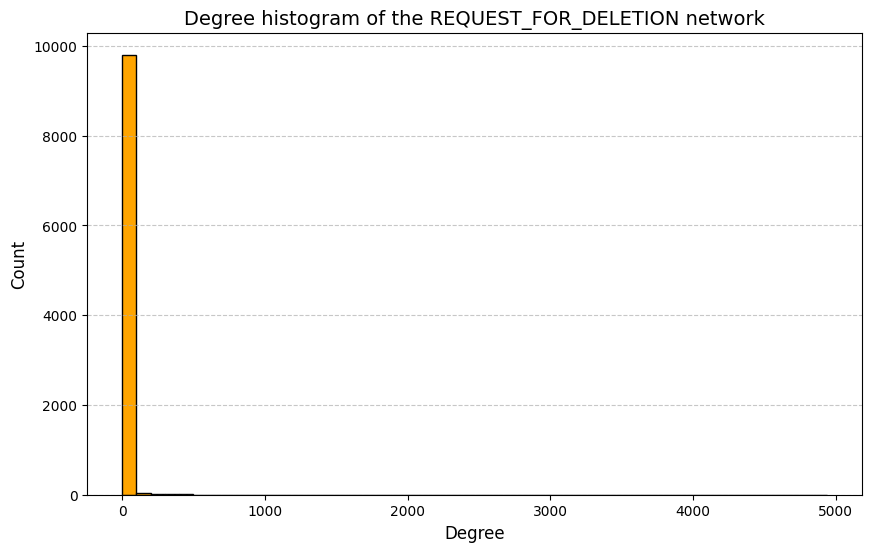

In [19]:
# Degree distribution
degree_sequence = [d for n, d in G_requests.degree()]
degree_counts = np.bincount(degree_sequence)
degree_values = np.nonzero(degree_counts)[0]

print("Degree distribution:")
for d, c in zip(degree_values, degree_counts[degree_values]):
    print(f"degree {d} :{c} nodes")

# Degree distribution chart
plt.figure(figsize=(10, 6))
plt.hist(degree_sequence, bins=50, color='orange', edgecolor='black')
plt.title("Degree histogram of the REQUEST_FOR_DELETION network", fontsize=14)
plt.xlabel("Degree", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Task C

Based on the small network BOT_REQUESTS.csv

In [ ]:
# Assume that the two with the highest degree are "suspected trolls"
degree_dict = dict(G.degree())
suspected_trolls = sorted(degree_dict.items(), key=lambda x: x[1], reverse=True)[:2]
troll_1, troll_2 = suspected_trolls[0][0], suspected_trolls[1][0]
print("Suspected troll users:")
print(f"1. {troll_1}(degree: {suspected_trolls[0][1]})")
print(f"2. {troll_2}(degree: {suspected_trolls[1][1]})")

# Calculate the shortest path length from two trolls
paths_t1 = nx.single_source_shortest_path_length(G, troll_1)
paths_t2 = nx.single_source_shortest_path_length(G, troll_2)

# Transmission risk score: The closer the distance, the higher the score
priority_scores = {}
for node in set(paths_t1) | set(paths_t2):
    if node in (troll_1, troll_2):
        continue
    d1 = paths_t1.get(node, float('inf'))
    d2 = paths_t2.get(node, float('inf'))
    min_distance = min(d1, d2)
    priority_scores[node] = 1 / (1 + min_distance)

# Generate a priority checklist
priority_list = sorted(priority_scores.items(), key=lambda x: x[1], reverse=True)
print("\nThe top 10 users recommended for priority inspection (highest risk of transmission):")
for rank, (user, score) in enumerate(priority_list[:10], start=1):
    print(f"{rank}. {user} (Transmission Risk Score: {score:.3f})")

Suspected troll users:
1. Pasleim（degree: 226)
2. Jura1（degree: 198)

The top 10 users recommended for priority inspection (highest risk of transmission):
1. Bene* (Transmission Risk Score: 0.500)
2. Máté (Transmission Risk Score: 0.500)
3. John Cummings (Transmission Risk Score: 0.500)
4. Anonymous_username_37 (Transmission Risk Score: 0.500)
5. Eru (Transmission Risk Score: 0.500)
6. Ju gatsu mikka (Transmission Risk Score: 0.500)
7. Japan Football (Transmission Risk Score: 0.500)
8. Yair rand (Transmission Risk Score: 0.500)
9. Ymblanter (Transmission Risk Score: 0.500)
10. Pintoch (Transmission Risk Score: 0.500)


Based on the medium network ITEMS.csv

In [27]:
# The two users with the highest degree are considered "suspected trolls"
degree_dict = dict(G_items.degree())
suspected_trolls = sorted(degree_dict.items(), key=lambda x: x[1], reverse=True)[:2]
troll_1, troll_2 = suspected_trolls[0][0], suspected_trolls[1][0]
print("Suspected troll users:")
print(f"1. {troll_1}(degree: {suspected_trolls[0][1]})")
print(f"2. {troll_2}(degree: {suspected_trolls[1][1]})")

# Calculate the shortest path length from two trolls
paths_t1 = nx.single_source_shortest_path_length(G_items, troll_1)
paths_t2 = nx.single_source_shortest_path_length(G_items, troll_2)

# Transmission risk score: The closer the distance, the higher the score
priority_scores = {}
for node in set(paths_t1) | set(paths_t2):
    if node in (troll_1, troll_2):
        continue
    d1 = paths_t1.get(node, float('inf'))
    d2 = paths_t2.get(node, float('inf'))
    min_distance = min(d1, d2)
    priority_scores[node] = 1 / (1 + min_distance)

# Generate a priority checklist
priority_list = sorted(priority_scores.items(), key=lambda x: x[1], reverse=True)
print("\nThe top 10 users recommended for priority inspection (highest risk of transmission):")
for rank, (user, score) in enumerate(priority_list[:10], start=1):
    print(f"{rank}. {user} (Transmission Risk Score: {score:.3f})")

Suspected troll users:
1. Infovarius(degree: 507)
2. Estopedist1(degree: 399)

The top 10 users recommended for priority inspection (highest risk of transmission):
1. Romanm (Transmission Risk Score: 0.500)
2. Svetlov Artem (Transmission Risk Score: 0.500)
3. 82.54.133.63 (Transmission Risk Score: 0.500)
4. Nullzero (Transmission Risk Score: 0.500)
5. Skazi (Transmission Risk Score: 0.500)
6. Broichmore (Transmission Risk Score: 0.500)
7. Jcfidy (Transmission Risk Score: 0.500)
8. Stho002 (Transmission Risk Score: 0.500)
9. Ahmed1591 (Transmission Risk Score: 0.500)
10. User123o987name (Transmission Risk Score: 0.500)


Based on the large network REQUEST_FOR_DELETION.csv

In [20]:
# The two users with the highest degree are considered "suspected trolls"
degree_dict = dict(G_requests.degree())
suspected_trolls = sorted(degree_dict.items(), key=lambda x: x[1], reverse=True)[:2]
troll_1, troll_2 = suspected_trolls[0][0], suspected_trolls[1][0]
print("Suspected troll users:")
print(f"1. {troll_1}(degree: {suspected_trolls[0][1]})")
print(f"2. {troll_2}(degree: {suspected_trolls[1][1]})")

# Calculate the shortest path length from two trolls
paths_t1 = nx.single_source_shortest_path_length(G_requests, troll_1)
paths_t2 = nx.single_source_shortest_path_length(G_requests, troll_2)

# Transmission risk score: The closer the distance, the higher the score
priority_scores = {}
for node in set(paths_t1) | set(paths_t2):
    if node in (troll_1, troll_2):
        continue
    d1 = paths_t1.get(node, float('inf'))
    d2 = paths_t2.get(node, float('inf'))
    min_distance = min(d1, d2)
    priority_scores[node] = 1 / (1 + min_distance)

# Generate a priority checklist
priority_list = sorted(priority_scores.items(), key=lambda x: x[1], reverse=True)
print("\nThe top 10 users recommended for priority inspection (highest risk of transmission):")
for rank, (user, score) in enumerate(priority_list[:10], start=1):
    print(f"{rank}. {user} (Transmission Risk Score: {score:.3f})")

Suspected troll users:
1. DeltaBot(degree: 4939)
2. BeneBot*(degree: 4355)

The top 10 users recommended for priority inspection (highest risk of transmission):
1. Levg (Transmission Risk Score: 0.500)
2. Prenn (Transmission Risk Score: 0.500)
3. Martin Be (Transmission Risk Score: 0.500)
4. ارژنگ (Transmission Risk Score: 0.500)
5. Kooma (Transmission Risk Score: 0.500)
6. Murma174 (Transmission Risk Score: 0.500)
7. AleMazzacane (Transmission Risk Score: 0.500)
8. Verbex (Transmission Risk Score: 0.500)
9. GAndy (Transmission Risk Score: 0.500)
10. 108.243.101.158 (Transmission Risk Score: 0.500)
